In [7]:
import pandas as pd
import numpy as np


In [8]:
data=pd.read_csv('train.csv')
x=data.iloc[:,0:20]
y=data.iloc[:,-1]

In [11]:
from sklearn.feature_selection import SelectKBest,chi2
best=SelectKBest(score_func=chi2,k=10)
fit=best.fit(x,y)
fit

SelectKBest(score_func=<function chi2 at 0x0000023032F8EDD0>)

In [12]:
dfscore=pd.DataFrame(fit.scores_)
dfcolumn=pd.DataFrame(x.columns)


In [13]:
featurescore=pd.concat([dfcolumn,dfscore],axis=1)
featurescore.columns=['Specs','Score']

In [14]:
featurescore

,Specs,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


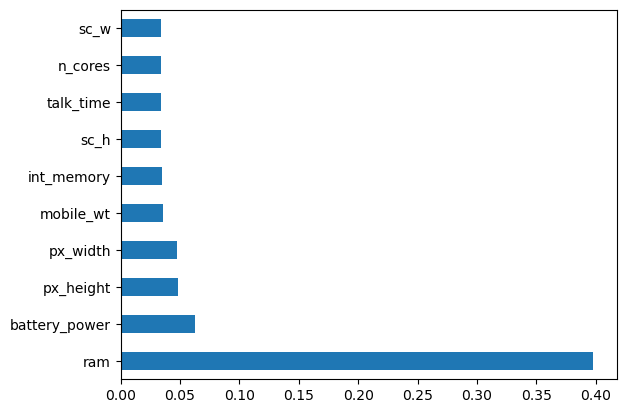

In [15]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)
feat_import=pd.Series(model.feature_importances_,index=x.columns)
feat_import.nlargest(10).plot(kind='barh')
plt.show()